## **GSR**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

gsr=pd.read_csv('17_GSR.csv')
gsr.head()

UnixTime  Row QuestionKey                   Timestamp  SampleNumber  \
0  1.676289e+09    1         NaN  2023-02-13 17:20:05.022000           NaN   
1  1.676289e+09    2         NaN  2023-02-13 17:20:05.024255       25850.0   
2  1.676289e+09    3         NaN  2023-02-13 17:20:05.032067       25851.0   
3  1.676289e+09    4         NaN  2023-02-13 17:20:05.039880       25852.0   
4  1.676289e+09    5         NaN  2023-02-13 17:20:05.047692       25853.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
0            NaN            NaN                   NaN             NaN   
1       403272.0    201953.1250          1.676289e+12          2797.0   
2       403528.0    201960.9375          1.676289e+12          2802.0   
3       403784.0    201968.7500          1.676289e+12          2799.0   
4       404040.0    201976.5625          1.676289e+12          2794.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
0             NaN      NaN                 NaN                  NaN   
1     4073.579487   1311.0           43.653938            22.907441   
2     4080.861538   1310.0           43.723506            22.870993   
3     4076.492308   1311.0           43.653938            22.907441   
4     4069.210256   1311.0           43.653938            22.907441   

   Packet reception rate RAW  
0                        NaN  
1                      100.0  
2                      100.0  
3                      100.0  
4                      100.0

In [2]:
gsr.isnull().sum()

UnixTime                         0
Row                              0
QuestionKey                  47000
Timestamp                        0
SampleNumber                     4
Timestamp RAW                    4
Timestamp CAL                    4
System Timestamp CAL             4
VSenseBatt RAW                   4
VSenseBatt CAL                   4
GSR RAW                          4
GSR Resistance CAL               4
GSR Conductance CAL              4
Packet reception rate RAW        4
dtype: int64

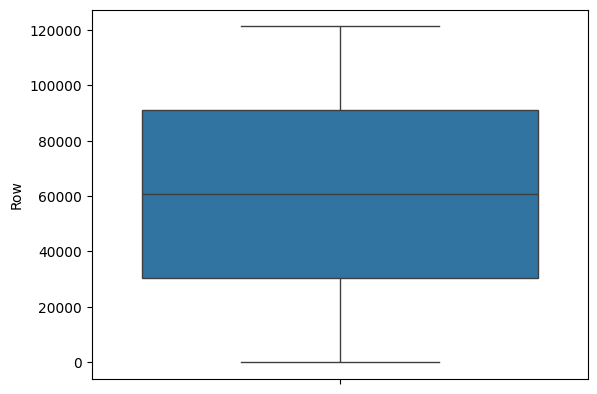

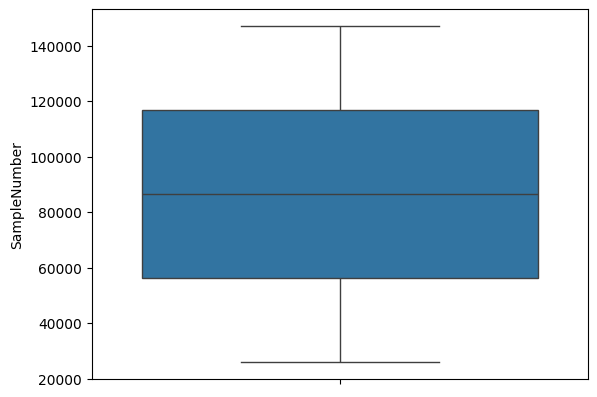

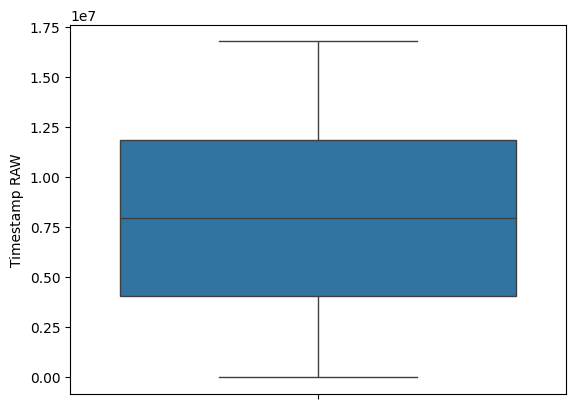

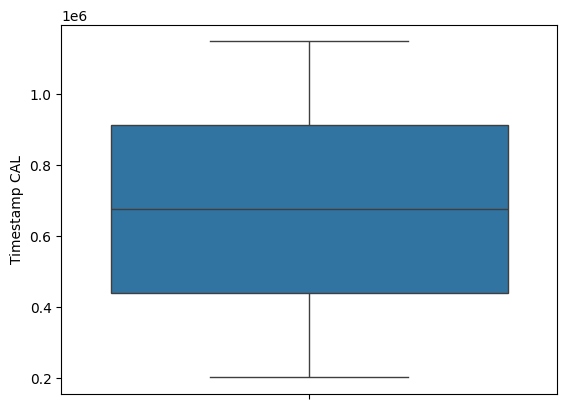

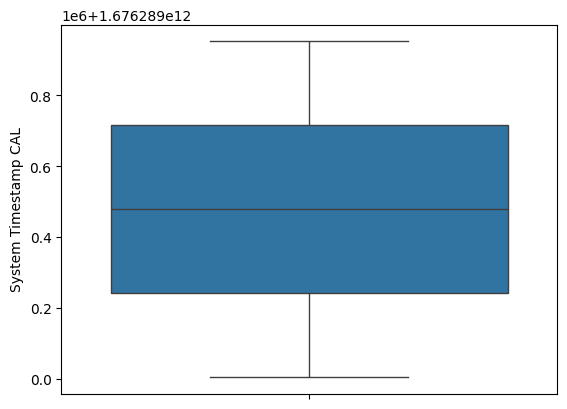

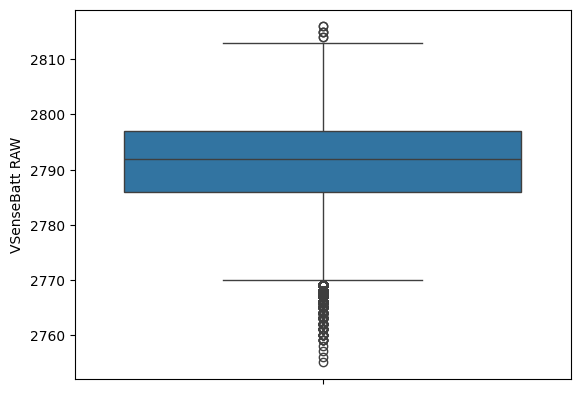

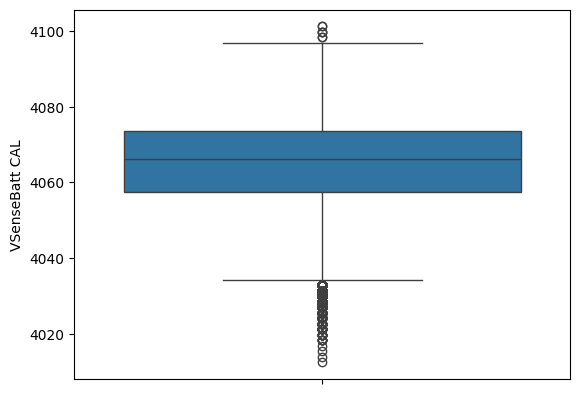

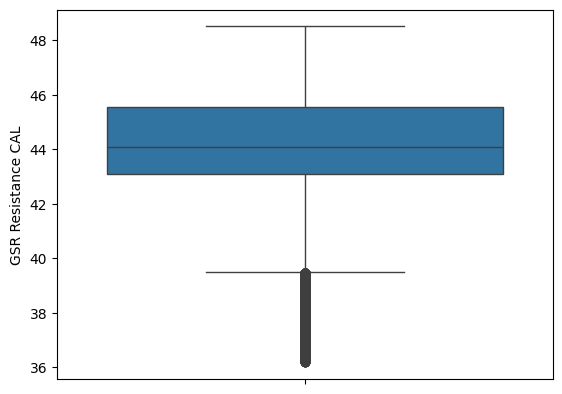

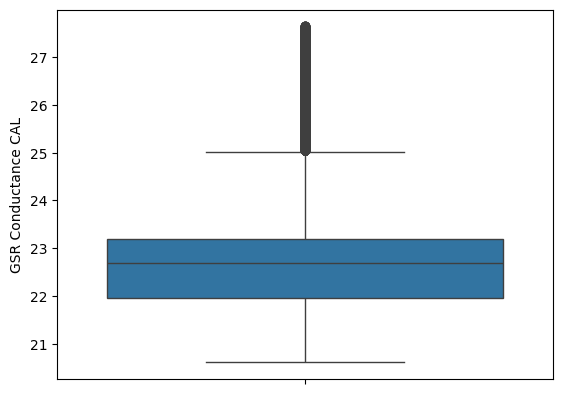

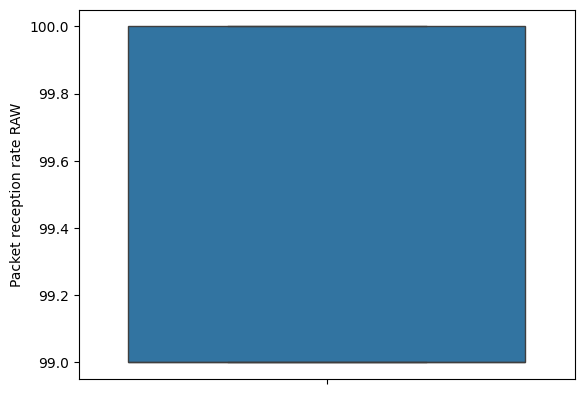

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
gsr_ol=gsr.select_dtypes(include=['float64','int64']).columns
for col in gsr_ol:
    
   sns.boxplot(data=gsr[col])
   plt.xticks(rotation=45)
   plt.show()

In [4]:
print(gsr.columns.tolist())

['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW']


In [5]:
gsr=gsr.dropna(subset=['SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW'])

In [6]:
gsr.isnull().sum()

UnixTime                         0
Row                              0
QuestionKey                  46996
Timestamp                        0
SampleNumber                     0
Timestamp RAW                    0
Timestamp CAL                    0
System Timestamp CAL             0
VSenseBatt RAW                   0
VSenseBatt CAL                   0
GSR RAW                          0
GSR Resistance CAL               0
GSR Conductance CAL              0
Packet reception rate RAW        0
dtype: int64

In [7]:
for col in gsr.select_dtypes(include=['object']).columns:
    gsr[col]=gsr[col].fillna(gsr[col].mode()[0])

In [8]:
gsr.isnull().sum()

UnixTime                     0
Row                          0
QuestionKey                  0
Timestamp                    0
SampleNumber                 0
Timestamp RAW                0
Timestamp CAL                0
System Timestamp CAL         0
VSenseBatt RAW               0
VSenseBatt CAL               0
GSR RAW                      0
GSR Resistance CAL           0
GSR Conductance CAL          0
Packet reception rate RAW    0
dtype: int64

In [9]:
gsr['Timestamp']=pd.to_datetime(gsr['Timestamp'], errors='coerce')

In [10]:
gsr.head()

UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
1  1.676289e+09    2      1Item5 2023-02-13 17:20:05.024255       25850.0   
2  1.676289e+09    3      1Item5 2023-02-13 17:20:05.032067       25851.0   
3  1.676289e+09    4      1Item5 2023-02-13 17:20:05.039880       25852.0   
4  1.676289e+09    5      1Item5 2023-02-13 17:20:05.047692       25853.0   
5  1.676289e+09    6      1Item5 2023-02-13 17:20:05.055505       25854.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
1       403272.0    201953.1250          1.676289e+12          2797.0   
2       403528.0    201960.9375          1.676289e+12          2802.0   
3       403784.0    201968.7500          1.676289e+12          2799.0   
4       404040.0    201976.5625          1.676289e+12          2794.0   
5       404296.0    201984.3750          1.676289e+12          2783.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
1     4073.579487   1311.0           43.653938            22.907441   
2     4080.861538   1310.0           43.723506            22.870993   
3     4076.492308   1311.0           43.653938            22.907441   
4     4069.210256   1311.0           43.653938            22.907441   
5     4053.189744   1311.0           43.653938            22.907441   

   Packet reception rate RAW  
1                      100.0  
2                      100.0  
3                      100.0  
4                      100.0  
5                      100.0

In [11]:
gsr.dtypes

UnixTime                            float64
Row                                   int64
QuestionKey                          object
Timestamp                    datetime64[ns]
SampleNumber                        float64
Timestamp RAW                       float64
Timestamp CAL                       float64
System Timestamp CAL                float64
VSenseBatt RAW                      float64
VSenseBatt CAL                      float64
GSR RAW                             float64
GSR Resistance CAL                  float64
GSR Conductance CAL                 float64
Packet reception rate RAW           float64
dtype: object

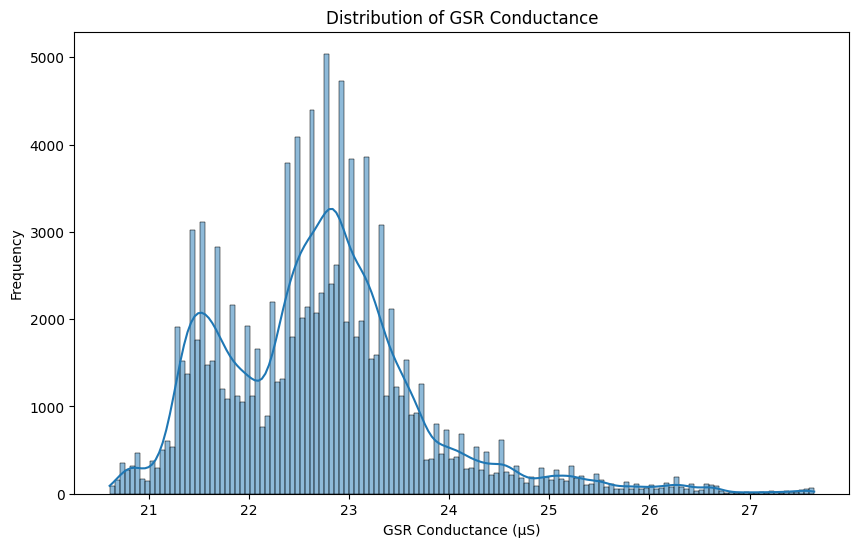

In [12]:
# 1. GSR Conductance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(gsr['GSR Conductance CAL'], kde=True)
plt.title('Distribution of GSR Conductance')
plt.xlabel('GSR Conductance (µS)')
plt.ylabel('Frequency')
# plt.savefig('gsr_conductance_distribution.png')
plt.show()

The histogram shows a multi-modal distribution, with several prominent peaks. The tallest peak is around 22.7 µS, suggesting a common range for participants' GSR. There are also smaller peaks, flatter peaks. This indicates that participants' overall GSR values are not concentrated in a single narrow range but rather spread across several distinct levels.

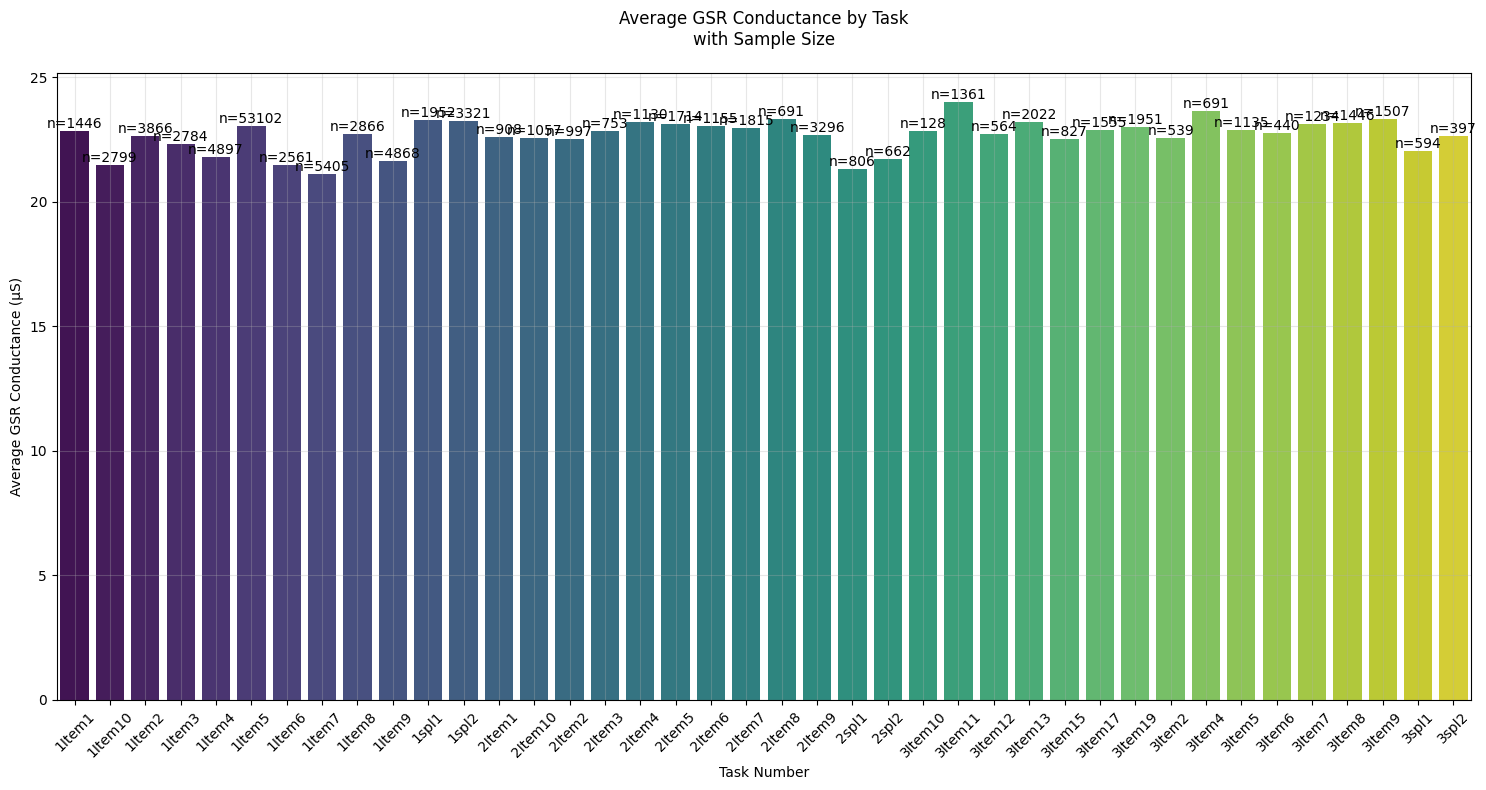

In [13]:
# Grouping GSR data by QuestionKey and calculating stats
task_gsr = gsr.groupby('QuestionKey')['GSR Conductance CAL'].agg(['mean', 'count']).reset_index()

# Set up the plot
plt.figure(figsize=(15, 8))

# Create a barplot of the mean GSR for each task
# ax = sns.barplot(x='QuestionKey', y='mean', data=task_gsr, palette='viridis')
ax = sns.barplot(x='QuestionKey', y='mean', data=task_gsr, hue='QuestionKey', palette='viridis', legend=False)

# Add text labels on each bar showing the sample size
for i, row in task_gsr.iterrows():
    plt.text(i, row['mean'], f'n={int(row["count"])}', 
             ha='center', va='bottom')

# Title and axis labels
plt.title('Average GSR Conductance by Task\nwith Sample Size', pad=20)
plt.xlabel('Task Number')
plt.ylabel('Average GSR Conductance (µS)')

# Improve readability: rotate x-axis labels
plt.xticks(rotation=45)

# Add a light grid
plt.grid(True, alpha=0.3)

# Adjust layout to fit elements nicely
plt.tight_layout()

# Save the figure as a PNG with high resolution
# plt.savefig('gsr_by_task_no_errorbar.png', bbox_inches='tight', dpi=300)

# Close the plot (good practice when generating multiple plots)
plt.show()


the chart visualizes how physiological arousal (measured by GSR conductance) varies across different tasks, also showing how many data points contributed to the average for each task.









In [14]:
gsr.columns.tolist()

['UnixTime',
 'Row',
 'QuestionKey',
 'Timestamp',
 'SampleNumber',
 'Timestamp RAW',
 'Timestamp CAL',
 'System Timestamp CAL',
 'VSenseBatt RAW',
 'VSenseBatt CAL',
 'GSR RAW',
 'GSR Resistance CAL',
 'GSR Conductance CAL',
 'Packet reception rate RAW']

In [16]:
gsr.head()

UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
1  1.676289e+09    2      1Item5 2023-02-13 17:20:05.024255       25850.0   
2  1.676289e+09    3      1Item5 2023-02-13 17:20:05.032067       25851.0   
3  1.676289e+09    4      1Item5 2023-02-13 17:20:05.039880       25852.0   
4  1.676289e+09    5      1Item5 2023-02-13 17:20:05.047692       25853.0   
5  1.676289e+09    6      1Item5 2023-02-13 17:20:05.055505       25854.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
1       403272.0    201953.1250          1.676289e+12          2797.0   
2       403528.0    201960.9375          1.676289e+12          2802.0   
3       403784.0    201968.7500          1.676289e+12          2799.0   
4       404040.0    201976.5625          1.676289e+12          2794.0   
5       404296.0    201984.3750          1.676289e+12          2783.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
1     4073.579487   1311.0           43.653938            22.907441   
2     4080.861538   1310.0           43.723506            22.870993   
3     4076.492308   1311.0           43.653938            22.907441   
4     4069.210256   1311.0           43.653938            22.907441   
5     4053.189744   1311.0           43.653938            22.907441   

   Packet reception rate RAW  
1                      100.0  
2                      100.0  
3                      100.0  
4                      100.0  
5                      100.0

## **PSY**

In [17]:
import pandas as pd
psy=pd.read_csv('17_PSY.csv')
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1   1spl2         1           spl2        nomatch       Easy  CORRECT   
2  1Item1         1          Item1          match       Easy  CORRECT   
3  1Item2         1          Item2          match       Easy  CORRECT   
4  1Item3         1          Item3          match       Easy  CORRECT   

   ResponseTime  routineStart          routineStamp    routineEnd  \
0     15.250041  1.676289e+09  13/02/2023, 17:22:08  1.676289e+09   
1     25.943368  1.676289e+09  13/02/2023, 17:22:24  1.676289e+09   
2     11.296311  1.676289e+09  13/02/2023, 17:22:50  1.676289e+09   
3     30.205318  1.676289e+09  13/02/2023, 17:23:01  1.676289e+09   
4     21.753516  1.676289e+09  13/02/2023, 17:23:31  1.676289e+09   

   Cat2FeedbackTime  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [18]:
psy.dtypes

Key                  object
Category              int64
QuestionNumber       object
matchOrnomatch       object
Difficulty           object
verdict              object
ResponseTime        float64
routineStart        float64
routineStamp         object
routineEnd          float64
Cat2FeedbackTime    float64
dtype: object

In [19]:
psy.isnull().sum()

Key                  0
Category             0
QuestionNumber       0
matchOrnomatch       1
Difficulty           1
verdict              1
ResponseTime         0
routineStart         0
routineStamp         0
routineEnd           0
Cat2FeedbackTime    30
dtype: int64

In [20]:
psy.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

In [21]:
psy['routineStart'] = pd.to_datetime(psy['routineStart'], errors='coerce')
psy['routineEnd'] = pd.to_datetime(psy['routineEnd'], errors='coerce')

In [22]:
psy.dtypes

Key                         object
Category                     int64
QuestionNumber              object
matchOrnomatch              object
Difficulty                  object
verdict                     object
ResponseTime               float64
routineStart        datetime64[ns]
routineStamp                object
routineEnd          datetime64[ns]
Cat2FeedbackTime           float64
dtype: object

In [23]:
psy['routineStamp'] = pd.to_datetime(psy['routineStamp'], dayfirst=True)

In [24]:
psy.dtypes

Key                         object
Category                     int64
QuestionNumber              object
matchOrnomatch              object
Difficulty                  object
verdict                     object
ResponseTime               float64
routineStart        datetime64[ns]
routineStamp        datetime64[ns]
routineEnd          datetime64[ns]
Cat2FeedbackTime           float64
dtype: object

In [25]:
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1   1spl2         1           spl2        nomatch       Easy  CORRECT   
2  1Item1         1          Item1          match       Easy  CORRECT   
3  1Item2         1          Item2          match       Easy  CORRECT   
4  1Item3         1          Item3          match       Easy  CORRECT   

   ResponseTime                  routineStart        routineStamp  \
0     15.250041 1970-01-01 00:00:01.676289128 2023-02-13 17:22:08   
1     25.943368 1970-01-01 00:00:01.676289144 2023-02-13 17:22:24   
2     11.296311 1970-01-01 00:00:01.676289170 2023-02-13 17:22:50   
3     30.205318 1970-01-01 00:00:01.676289181 2023-02-13 17:23:01   
4     21.753516 1970-01-01 00:00:01.676289211 2023-02-13 17:23:31   

                     routineEnd  Cat2FeedbackTime  
0 1970-01-01 00:00:01.676289144               NaN  
1 1970-01-01 00:00:01.676289170               NaN  
2 1970-01-01 00:00:01.676289181               NaN  
3 1970-01-01 00:00:01.676289211               NaN  
4 1970-01-01 00:00:01.676289233               NaN

In [26]:
psy['ResponseTime'] = psy['ResponseTime'].round(2)

In [27]:
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1   1spl2         1           spl2        nomatch       Easy  CORRECT   
2  1Item1         1          Item1          match       Easy  CORRECT   
3  1Item2         1          Item2          match       Easy  CORRECT   
4  1Item3         1          Item3          match       Easy  CORRECT   

   ResponseTime                  routineStart        routineStamp  \
0         15.25 1970-01-01 00:00:01.676289128 2023-02-13 17:22:08   
1         25.94 1970-01-01 00:00:01.676289144 2023-02-13 17:22:24   
2         11.30 1970-01-01 00:00:01.676289170 2023-02-13 17:22:50   
3         30.21 1970-01-01 00:00:01.676289181 2023-02-13 17:23:01   
4         21.75 1970-01-01 00:00:01.676289211 2023-02-13 17:23:31   

                     routineEnd  Cat2FeedbackTime  
0 1970-01-01 00:00:01.676289144               NaN  
1 1970-01-01 00:00:01.676289170               NaN  
2 1970-01-01 00:00:01.676289181               NaN  
3 1970-01-01 00:00:01.676289211               NaN  
4 1970-01-01 00:00:01.676289233               NaN

In [28]:
psy.shape

(40, 11)

In [29]:
if 'Cat2FeedbackTime' in psy.columns:
    psy['Cat2FeedbackTime'] = psy['Cat2FeedbackTime'].round(2)

In [30]:
import numpy as np
numeric_cols = psy.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = psy[col].quantile(0.25)
    Q3 = psy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((psy[col] < lower) | (psy[col] > upper)).any():
        outlier_cols.append(col)

In [31]:
for col in psy.columns:
    if psy[col].isnull().any():
        if col in outlier_cols:
            psy[col] = psy[col].fillna(psy[col].median())
        elif psy[col].dtype in ['float64', 'int64']:
            psy[col] = psy[col].fillna(psy[col].mean())
        else:
            psy[col] = psy[col].fillna(psy[col].mode()[0])

In [32]:
psy.isnull().sum()

Key                 0
Category            0
QuestionNumber      0
matchOrnomatch      0
Difficulty          0
verdict             0
ResponseTime        0
routineStart        0
routineStamp        0
routineEnd          0
Cat2FeedbackTime    0
dtype: int64

In [33]:
psy.columns.tolist()

['Key',
 'Category',
 'QuestionNumber',
 'matchOrnomatch',
 'Difficulty',
 'verdict',
 'ResponseTime',
 'routineStart',
 'routineStamp',
 'routineEnd',
 'Cat2FeedbackTime']

In [34]:
psy_cr=psy.select_dtypes(include=['float64','int64'])
psy_corr=psy_cr.corr().round(2)
psy_corr

Category  ResponseTime  Cat2FeedbackTime
Category               1.0         -0.70              0.00
ResponseTime          -0.7          1.00             -0.07
Cat2FeedbackTime       0.0         -0.07              1.00

In [35]:
# 1. Response Time Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# sns.histplot(psy['ResponseTime'], kde=True,)
sns.histplot(data=psy, x='ResponseTime', hue='Difficulty', kde=True, multiple='stack')
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
# plt.savefig('response_time_distribution.png')
plt.show()

The distribution of response times clearly varies by task difficulty. Easy tasks were answered quickly and consistently, while difficult tasks resulted in slower and more variable response times. Medium tasks fell in between. This pattern highlights that task difficulty meaningfully influences the cognitive effort or processing time required during mental rotation tasks.

In [36]:
# Assuming both have a common task identifier — looks like 'QuestionNumber' from PSY vs 'QuestionKey' from GSR
merged_df = pd.merge(gsr, psy, left_on='QuestionKey', right_on='QuestionNumber', how='inner')

print(merged_df.columns)  # Verify merged columns


Index(['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber',
       'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL',
       'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL',
       'GSR Conductance CAL', 'Packet reception rate RAW', 'Key', 'Category',
       'QuestionNumber', 'matchOrnomatch', 'Difficulty', 'verdict',
       'ResponseTime', 'routineStart', 'routineStamp', 'routineEnd',
       'Cat2FeedbackTime'],
      dtype='object')


In [37]:
print(gsr['QuestionKey'].unique()[:10])
print(psy['QuestionNumber'].unique()[:10])


['1Item5' '1spl1' '1spl2' '1Item1' '1Item2' '1Item3' '1Item4' '1Item6'
 '1Item7' '1Item8']
['spl1' 'spl2' 'Item1' 'Item2' 'Item3' 'Item4' 'Item5' 'Item6' 'Item7'
 'Item8']


In [38]:
# Strip the leading digit from GSR QuestionKey
gsr['CleanKey'] = gsr['QuestionKey'].str.replace(r'^\d+', '', regex=True)

# Verify cleaned keys
print(gsr['CleanKey'].unique()[:10])

['Item5' 'spl1' 'spl2' 'Item1' 'Item2' 'Item3' 'Item4' 'Item6' 'Item7'
 'Item8']


In [39]:
# Now merge on cleaned key
merged_df = pd.merge(gsr, psy, left_on='CleanKey', right_on='QuestionNumber', how='inner')

# Check the result
print(f"Merged data shape: {merged_df.shape}")
print(merged_df.head())

Merged data shape: (341275, 26)
       UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
0  1.676289e+09    2      1Item5 2023-02-13 17:20:05.024255       25850.0   
1  1.676289e+09    2      1Item5 2023-02-13 17:20:05.024255       25850.0   
2  1.676289e+09    2      1Item5 2023-02-13 17:20:05.024255       25850.0   
3  1.676289e+09    3      1Item5 2023-02-13 17:20:05.032067       25851.0   
4  1.676289e+09    3      1Item5 2023-02-13 17:20:05.032067       25851.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
0       403272.0    201953.1250          1.676289e+12          2797.0   
1       403272.0    201953.1250          1.676289e+12          2797.0   
2       403272.0    201953.1250          1.676289e+12          2797.0   
3       403528.0    201960.9375          1.676289e+12          2802.0   
4       403528.0    201960.9375          1.676289e+12          2802.0   

   VSenseBatt CAL  ...  Category  QuestionNumber  matchOrnomatch  

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Difficulty', y='GSR Conductance CAL', data=merged_df, palette='muted',hue='Category')
plt.title('Pre-task GSR by Task Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('GSR Conductance (µS)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


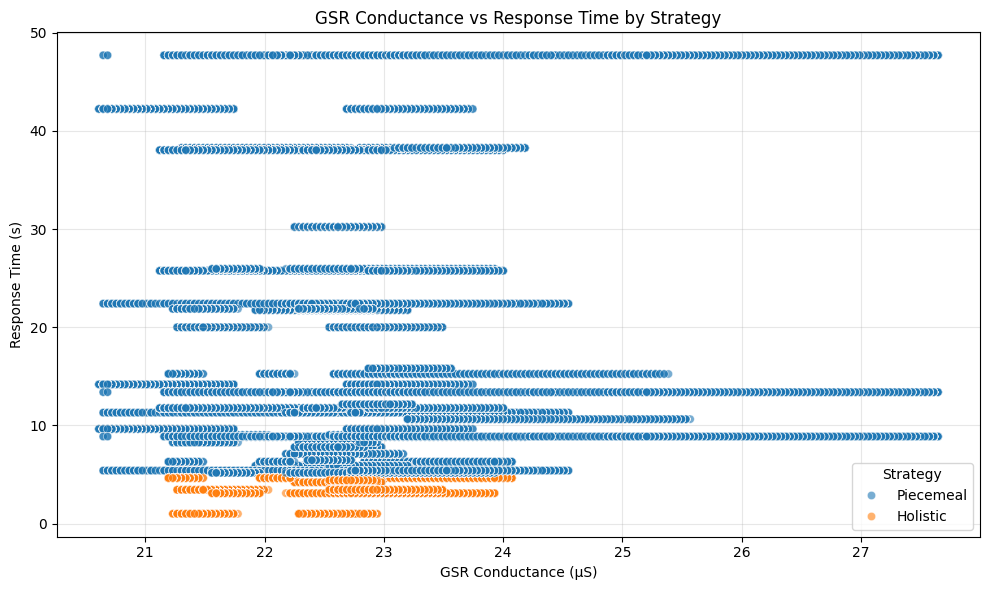

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GSR Conductance CAL', y='ResponseTime', hue='Strategy', data=merged_df, alpha=0.6)
plt.title('GSR Conductance vs Response Time by Strategy')
plt.xlabel('GSR Conductance (µS)')
plt.ylabel('Response Time (s)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [44]:
# 3. Response Time by Verdict
plt.figure(figsize=(10, 6))
sns.barplot(x='verdict', y='ResponseTime', data=psy,hue='Difficulty')
plt.title('Response Time by Verdict')
plt.xlabel('Verdict')
plt.ylabel('Response Time (seconds)')
# plt.savefig('response_time_by_verdict.png')
plt.show()

## **TIVA**

In [45]:
tv=pd.read_csv('17_TIVA.csv')
tv.head()

UnixTime  Row QuestionKey                   Timestamp  SampleNumber  \
0  1.676289e+09    1         NaN  2023-02-13 17:20:05.022000          -1.0   
1  1.676289e+09    2         NaN  2023-02-13 17:20:05.112659          -1.0   
2  1.676289e+09    3         NaN  2023-02-13 17:20:05.208286          -1.0   
3  1.676289e+09    4         NaN  2023-02-13 17:20:05.253287           NaN   
4  1.676289e+09    5         NaN  2023-02-13 17:20:05.321976           0.0   

      Anger  Contempt   Disgust     Fear       Joy  ...  Nose Wrinkle  \
0  0.114693  0.129757  0.024476  0.26858  0.024082  ...      0.157560   
1  0.113514  0.104058  0.024248  0.42329  0.024077  ...      0.140959   
2       NaN       NaN       NaN      NaN       NaN  ...           NaN   
3       NaN       NaN       NaN      NaN       NaN  ...           NaN   
4       NaN       NaN       NaN      NaN       NaN  ...           NaN   

      Smile     Smirk  Upper Lip Raise  Blink  BlinkRate     Pitch       Yaw  \
0  0.003707  0.031754         0.079977    0.0       18.0 -3.104980  4.607009   
1  0.003211  0.026692         0.070667    0.0       18.0 -2.981833  3.956563   
2       NaN       NaN              NaN    NaN        NaN       NaN       NaN   
3       NaN       NaN              NaN    NaN        NaN       NaN       NaN   
4       NaN       NaN              NaN    NaN        NaN       NaN       NaN   

       Roll  Interocular Distance  
0  1.147143            151.762711  
1  0.924472            152.536667  
2       NaN                   NaN  
3       NaN                   NaN  
4       NaN                   NaN  

[5 rows x 44 columns]

In [46]:
tv.dtypes

UnixTime                float64
Row                       int64
QuestionKey              object
Timestamp                object
SampleNumber            float64
Anger                   float64
Contempt                float64
Disgust                 float64
Fear                    float64
Joy                     float64
Sadness                 float64
Surprise                float64
Engagement              float64
Valence                 float64
Sentimentality          float64
Confusion               float64
Neutral                 float64
Attention               float64
Brow Furrow             float64
Brow Raise              float64
Cheek Raise             float64
Chin Raise              float64
Dimpler                 float64
Eye Closure             float64
Eye Widen               float64
Inner Brow Raise        float64
Jaw Drop                float64
Lip Corner Depressor    float64
Lip Press               float64
Lip Pucker              float64
Lip Stretch             float64
Lip Suck

In [47]:
tv['Timestamp'] = pd.to_datetime(tv['Timestamp'], errors='coerce')

In [48]:
print(tv.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9588    False
9589    False
9590    False
9591    False
9592    False
Length: 9593, dtype: bool


In [49]:
 tv.shape

(9593, 44)

In [50]:
tv.isnull().sum()

UnixTime                   0
Row                        0
QuestionKey             3724
Timestamp                  0
SampleNumber               3
Anger                    817
Contempt                 817
Disgust                  817
Fear                     817
Joy                      817
Sadness                  817
Surprise                 817
Engagement               817
Valence                  817
Sentimentality           817
Confusion                817
Neutral                  817
Attention                817
Brow Furrow              817
Brow Raise               817
Cheek Raise              817
Chin Raise               817
Dimpler                  817
Eye Closure              817
Eye Widen                817
Inner Brow Raise         817
Jaw Drop                 817
Lip Corner Depressor     817
Lip Press                817
Lip Pucker               817
Lip Stretch              817
Lip Suck                 817
Lid Tighten              817
Mouth Open               817
Nose Wrinkle  

In [51]:
# Identify columns with outliers using IQR
numeric_cols = tv.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = tv[col].quantile(0.25)
    Q3 = tv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((tv[col] < lower) | (tv[col] > upper)).any():
        print(outlier_cols.append(col))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [52]:
for col in tv.columns:
    if tv[col].isnull().any():
        if col in outlier_cols:
            tv[col] = tv[col].fillna(tv[col].median())
        elif tv[col].dtype in ['float64', 'int64']:
            tv[col] = tv[col].fillna(tv[col].mean())
        else:
            tv[col] = tv[col].fillna(tv[col].mode()[0])

In [53]:
tv.isnull().sum()

UnixTime                0
Row                     0
QuestionKey             0
Timestamp               0
SampleNumber            0
Anger                   0
Contempt                0
Disgust                 0
Fear                    0
Joy                     0
Sadness                 0
Surprise                0
Engagement              0
Valence                 0
Sentimentality          0
Confusion               0
Neutral                 0
Attention               0
Brow Furrow             0
Brow Raise              0
Cheek Raise             0
Chin Raise              0
Dimpler                 0
Eye Closure             0
Eye Widen               0
Inner Brow Raise        0
Jaw Drop                0
Lip Corner Depressor    0
Lip Press               0
Lip Pucker              0
Lip Stretch             0
Lip Suck                0
Lid Tighten             0
Mouth Open              0
Nose Wrinkle            0
Smile                   0
Smirk                   0
Upper Lip Raise         0
Blink       

In [54]:
tv_cr=tv.select_dtypes(include=['float64','int64'])
tv_corr=tv_cr.corr().round(2)
tv_corr

UnixTime   Row  SampleNumber  Anger  Contempt  Disgust  \
UnixTime                  1.00  1.00          1.00  -0.08     -0.01    -0.04   
Row                       1.00  1.00          1.00  -0.08     -0.01    -0.04   
SampleNumber              1.00  1.00          1.00  -0.08     -0.01    -0.04   
Anger                    -0.08 -0.08         -0.08   1.00      0.05     0.52   
Contempt                 -0.01 -0.01         -0.01   0.05      1.00     0.01   
Disgust                  -0.04 -0.04         -0.04   0.52      0.01     1.00   
Fear                      0.02  0.02          0.02   0.52     -0.16     0.04   
Joy                      -0.07 -0.07         -0.07   0.16      0.46     0.17   
Sadness                  -0.19 -0.19         -0.19   0.18      0.17     0.01   
Surprise                  0.04  0.04          0.04   0.48     -0.13     0.07   
Engagement               -0.13 -0.13         -0.13   0.65      0.26     0.41   
Valence                   0.11  0.11          0.11  -0.32     -0.26    -0.01   
Sentimentality           -0.27 -0.27         -0.27   0.05      0.23    -0.02   
Confusion                -0.15 -0.15         -0.15   0.11      0.15     0.13   
Neutral                  -0.01 -0.01         -0.01  -0.69      0.09    -0.52   
Attention                -0.11 -0.11         -0.11  -0.04      0.01    -0.04   
Brow Furrow              -0.05 -0.05         -0.05   0.33      0.01     0.55   
Brow Raise               -0.01 -0.01         -0.01   0.21     -0.24    -0.01   
Cheek Raise              -0.09 -0.09         -0.09   0.19      0.43     0.20   
Chin Raise               -0.20 -0.20         -0.20   0.18      0.08     0.00   
Dimpler                  -0.00 -0.00         -0.00   0.15      0.63     0.00   
Eye Closure              -0.01 -0.01         -0.01   0.02      0.00     0.00   
Eye Widen                 0.03  0.03          0.03   0.58     -0.17    -0.00   
Inner Brow Raise         -0.19 -0.19         -0.19   0.12      0.24     0.06   
Jaw Drop                  0.27  0.27          0.27   0.16      0.08     0.12   
Lip Corner Depressor     -0.06 -0.06         -0.06   0.02     -0.04    -0.00   
Lip Press                -0.17 -0.17         -0.17   0.31      0.34    -0.01   
Lip Pucker               -0.06 -0.06         -0.06   0.24      0.06     0.34   
Lip Stretch              -0.03 -0.03         -0.03   0.18      0.60     0.01   
Lip Suck                 -0.03 -0.03         -0.03   0.18      0.21     0.01   
Lid Tighten              -0.01 -0.01         -0.01   0.08      0.01     0.10   
Mouth Open               -0.05 -0.05         -0.05   0.55      0.03     0.43   
Nose Wrinkle             -0.05 -0.05         -0.05   0.47      0.02     0.94   
Smile                    -0.02 -0.02         -0.02   0.03      0.41    -0.00   
Smirk                    -0.01 -0.01         -0.01   0.12      0.91    -0.00   
Upper Lip Raise          -0.05 -0.05         -0.05   0.57      0.00     0.92   
Blink                    -0.02 -0.02         -0.02  -0.01     -0.00    -0.00   
BlinkRate                -0.28 -0.28         -0.28  -0.02      0.03    -0.00   
Pitch                     0.16  0.16          0.16   0.09      0.09     0.08   
Yaw                      -0.44 -0.44         -0.44   0.12     -0.03     0.08   
Roll                      0.64  0.64          0.64  -0.09     -0.02    -0.03   
Interocular Distance     -0.14 -0.14         -0.14  -0.06     -0.07    -0.02   

                      Fear   Joy  Sadness  Surprise  ...  Nose Wrinkle  Smile  \
UnixTime              0.02 -0.07    -0.19      0.04  ...         -0.05  -0.02   
Row                   0.02 -0.07    -0.19      0.04  ...         -0.05  -0.02   
SampleNumber          0.02 -0.07    -0.19      0.04  ...         -0.05  -0.02   
Anger                 0.52  0.16     0.18      0.48  ...          0.47   0.03   
Contempt             -0.16  0.46     0.17     -0.13  ...          0.02   0.41   
Disgust               0.04  0.17     0.01      0.07  ...          0.94  -0.00   
Fear          

In [55]:
print(tv.columns.tolist())

['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral', 'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Pitch', 'Yaw', 'Roll', 'Interocular Distance']


In [56]:
tv.head()


UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
0  1.676289e+09    1      1Item5 2023-02-13 17:20:05.022000     -1.000000   
1  1.676289e+09    2      1Item5 2023-02-13 17:20:05.112659     -1.000000   
2  1.676289e+09    3      1Item5 2023-02-13 17:20:05.208286     -1.000000   
3  1.676289e+09    4      1Item5 2023-02-13 17:20:05.253287   4791.500313   
4  1.676289e+09    5      1Item5 2023-02-13 17:20:05.321976      0.000000   

      Anger  Contempt   Disgust      Fear       Joy  ...  Nose Wrinkle  \
0  0.114693  0.129757  0.024476  0.268580  0.024082  ...      0.157560   
1  0.113514  0.104058  0.024248  0.423290  0.024077  ...      0.140959   
2  0.137470  0.193007  0.025502  0.133218  0.024106  ...      0.006745   
3  0.137470  0.193007  0.025502  0.133218  0.024106  ...      0.006745   
4  0.137470  0.193007  0.025502  0.133218  0.024106  ...      0.006745   

      Smile     Smirk  Upper Lip Raise  Blink  BlinkRate      Pitch       Yaw  \
0  0.003707  0.031754         0.079977    0.0  18.000000  -3.104980  4.607009   
1  0.003211  0.026692         0.070667    0.0  18.000000  -2.981833  3.956563   
2  0.001094  0.062762         0.001630    0.0   6.374658  16.905005 -1.372736   
3  0.001094  0.062762         0.001630    0.0   6.374658  16.905005 -1.372736   
4  0.001094  0.062762         0.001630    0.0   6.374658  16.905005 -1.372736   

       Roll  Interocular Distance  
0  1.147143            151.762711  
1  0.924472            152.536667  
2  8.022282            132.479904  
3  8.022282            132.479904  
4  8.022282            132.479904  

[5 rows x 44 columns]

In [57]:
tv.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9588    False
9589    False
9590    False
9591    False
9592    False
Length: 9593, dtype: bool

In [58]:
# 1. Plot Emotion Distributions
print("Generating emotion distributions...")
emotion_cols = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 
               'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral']

plt.figure(figsize=(20, 10))
for i, col in enumerate(emotion_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=tv, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('tiva_visualizations/emotion_distributions.png')
plt.show()

Generating emotion distributions...


In most plots:

* The majority of values cluster at or near 0 → meaning most of the time, the emotion level was minimal or not detected.

* There are occasional non-zero values → moments when that emotion was expressed.

* Some emotions (like Neutral and Valence) show higher values (e.g. near 100% for Neutral) → these were dominant states most of the time.

* For sentimentality, you can see a small cluster at a low value  → indicating rare but consistent small levels of sentiments detected.


Generating attention metrics...


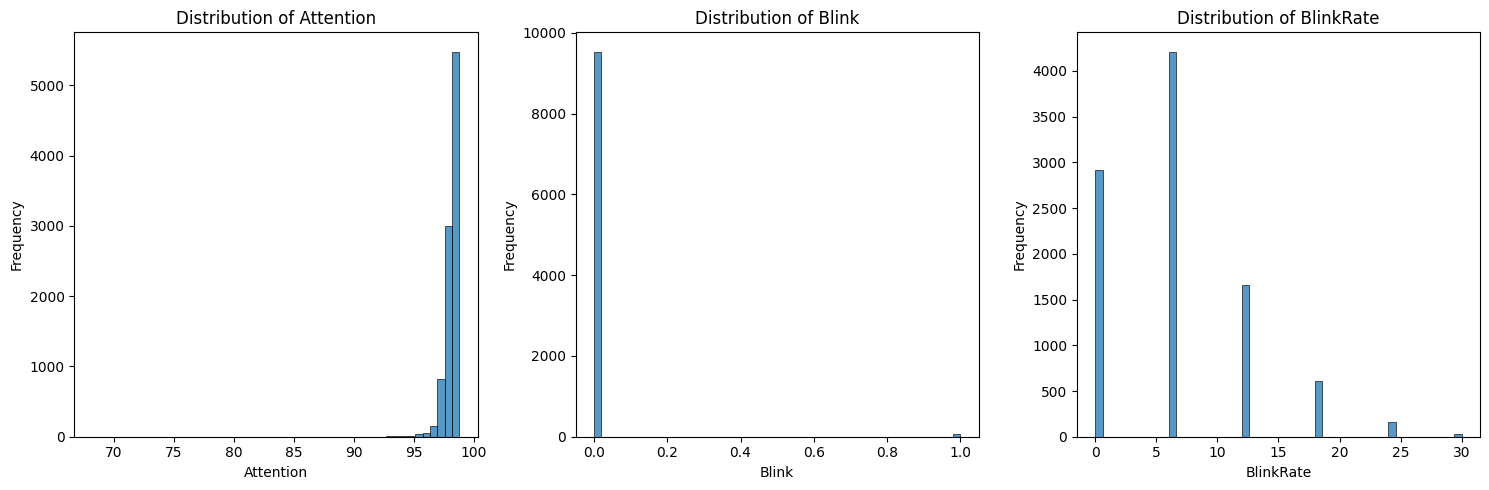

In [60]:
# 5. Plot Attention Metrics
print("Generating attention metrics...")
attention_cols = ['Attention', 'Blink', 'BlinkRate']

plt.figure(figsize=(15, 5))
for i, col in enumerate(attention_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=tv, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('tiva_visualizations/attention_metrics.png')
plt.show()

 * **Distribution of Attention**
* The vast majority of attention values cluster tightly between ~95 and 98.
* A small tail stretches down toward ~92.
* Interpretation:
The participant maintained high attention during most of the task.
Very few moments of low attention.

 * **Distribution of Blink**
* Almost all values are at 0 → meaning no blink at most time points.
* A few points at 1 → indicating actual blink events.
* Interpretation:
The participant blinked very rarely during the task (expected during focused work).

 * **Distribution of BlinkRate**
* Most of the blink rate values are low (0–7 blinks per time window).
* A long tail — a few moments had higher blink rates (up to 30).
* Interpretation:
The participant generally had a low blink rate, with occasional bursts of blinking (could indicate cognitive fatigue, distraction, or momentary breaks).

* **Overall inference**
 This figure tells you:
* The participant showed consistent high attention.
* Blinked rarely, as expected during a demanding visual-cognitive task.
* Blink rate spikes might mark brief moments of cognitive load relief, fatigue, or disengagement.



## **IVT**

In [61]:
import pandas as pd
iv=pd.read_csv('17_IVT.csv')
iv.head()

UnixTime  Row QuestionKey                   Timestamp  Gaze X  Gaze Y  \
0  1.676289e+09    1         NaN  2023-02-13 17:20:05.022000     NaN     NaN   
1  1.676289e+09    2         NaN  2023-02-13 17:20:05.029759  1096.0   586.0   
2  1.676289e+09    3         NaN  2023-02-13 17:20:05.038106  1099.5   585.0   
3  1.676289e+09    4         NaN  2023-02-13 17:20:05.046436  1099.5   577.0   
4  1.676289e+09    5         NaN  2023-02-13 17:20:05.054882  1114.0   567.0   

   Interpolated Gaze X  Interpolated Gaze Y  Interpolated Distance  \
0                  NaN                  NaN                    NaN   
1          1096.500000           586.500000             608.973602   
2          1098.333333           582.666667             609.100708   
3          1104.333333           576.333333             609.139923   
4          1108.166667           569.666667             609.266052   

   Gaze Velocity  ...  Saccade Index  Saccade Index by Stimulus  \
0            NaN  ...            NaN                        NaN   
1       7.963647  ...            NaN                        NaN   
2      12.924166  ...            NaN                        NaN   
3      16.315968  ...            NaN                        NaN   
4      12.824546  ...            NaN                        NaN   

   Saccade Start  Saccade End  Saccade Duration  Saccade Amplitude  \
0            NaN          NaN               NaN                NaN   
1            NaN          NaN               NaN                NaN   
2            NaN          NaN               NaN                NaN   
3            NaN          NaN               NaN                NaN   
4            NaN          NaN               NaN                NaN   

   Saccade Peak Velocity  Saccade Peak Acceleration  \
0                    NaN                        NaN   
1                    NaN                        NaN   
2                    NaN                        NaN   
3                    NaN                        NaN   
4                    NaN                        NaN   

   Saccade Peak Deceleration  Saccade Direction  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  

[5 rows x 29 columns]

In [62]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113673    False
113674    False
113675    False
113676    False
113677    False
Length: 113678, dtype: bool

In [63]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113673    False
113674    False
113675    False
113676    False
113677    False
Length: 113678, dtype: bool

In [64]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113673    False
113674    False
113675    False
113676    False
113677    False
Length: 113678, dtype: bool

In [65]:
iv.dtypes

UnixTime                      float64
Row                             int64
QuestionKey                    object
Timestamp                      object
Gaze X                        float64
Gaze Y                        float64
Interpolated Gaze X           float64
Interpolated Gaze Y           float64
Interpolated Distance         float64
Gaze Velocity                 float64
Gaze Acceleration             float64
Fixation Index                float64
Fixation Index by Stimulus    float64
Fixation X                    float64
Fixation Y                    float64
Fixation Start                float64
Fixation End                  float64
Fixation Duration             float64
Fixation Dispersion           float64
Saccade Index                 float64
Saccade Index by Stimulus     float64
Saccade Start                 float64
Saccade End                   float64
Saccade Duration              float64
Saccade Amplitude             float64
Saccade Peak Velocity         float64
Saccade Peak

In [66]:
iv['Timestamp'] = pd.to_datetime(iv['Timestamp'], errors='coerce')

In [67]:
# Identify columns with outliers using IQR
numeric_cols = iv.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = iv[col].quantile(0.25)
    Q3 = iv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((iv[col] < lower) | (iv[col] > upper)).any():
        outlier_cols.append(col)

In [68]:

# Fill nulls: median for columns with outliers, mean for other numeric, mode for object
for col in iv.columns:
    if iv[col].isnull().any():
        if col in outlier_cols:
            iv[col] = iv[col].fillna(iv[col].median())
        elif iv[col].dtype in ['float64', 'int64']:
            iv[col] = iv[col].fillna(iv[col].mean())
        else:
            iv[col] = iv[col].fillna(iv[col].mode()[0])

In [69]:
iv.isnull().sum()

UnixTime                      0
Row                           0
QuestionKey                   0
Timestamp                     0
Gaze X                        0
Gaze Y                        0
Interpolated Gaze X           0
Interpolated Gaze Y           0
Interpolated Distance         0
Gaze Velocity                 0
Gaze Acceleration             0
Fixation Index                0
Fixation Index by Stimulus    0
Fixation X                    0
Fixation Y                    0
Fixation Start                0
Fixation End                  0
Fixation Duration             0
Fixation Dispersion           0
Saccade Index                 0
Saccade Index by Stimulus     0
Saccade Start                 0
Saccade End                   0
Saccade Duration              0
Saccade Amplitude             0
Saccade Peak Velocity         0
Saccade Peak Acceleration     0
Saccade Peak Deceleration     0
Saccade Direction             0
dtype: int64

In [70]:
iv_cr=iv.select_dtypes(include=['float64','int64'])
iv_corr=iv_cr.corr().round(2)
iv_corr

UnixTime   Row  Gaze X  Gaze Y  \
UnixTime                        1.00  1.00   -0.10    0.06   
Row                             1.00  1.00   -0.10    0.06   
Gaze X                         -0.10 -0.10    1.00   -0.03   
Gaze Y                          0.06  0.06   -0.03    1.00   
Interpolated Gaze X            -0.10 -0.10    1.00   -0.03   
Interpolated Gaze Y             0.06  0.06   -0.03    1.00   
Interpolated Distance           0.29  0.29   -0.24    0.02   
Gaze Velocity                   0.02  0.02   -0.00   -0.00   
Gaze Acceleration              -0.00 -0.00   -0.01    0.01   
Fixation Index                  0.88  0.88   -0.09    0.06   
Fixation Index by Stimulus      0.88  0.88   -0.09    0.06   
Fixation X                     -0.09 -0.09    0.90   -0.02   
Fixation Y                      0.06  0.06   -0.02    0.88   
Fixation Start                  0.88  0.88   -0.09    0.06   
Fixation End                    0.88  0.88   -0.09    0.06   
Fixation Duration              -0.03 -0.03    0.01    0.05   
Fixation Dispersion            -0.02 -0.02    0.08    0.06   
Saccade Index                   0.37  0.37   -0.03    0.02   
Saccade Index by Stimulus       0.37  0.37   -0.03    0.02   
Saccade Start                   0.37  0.37   -0.03    0.02   
Saccade End                     0.37  0.37   -0.03    0.02   
Saccade Duration                0.03  0.03   -0.02    0.00   
Saccade Amplitude               0.02  0.02   -0.01   -0.02   
Saccade Peak Velocity           0.03  0.03   -0.01   -0.01   
Saccade Peak Acceleration       0.02  0.02   -0.02    0.00   
Saccade Peak Deceleration      -0.02 -0.02    0.01    0.00   
Saccade Direction               0.00  0.00   -0.00    0.00   

                            Interpolated Gaze X  Interpolated Gaze Y  \
UnixTime                                  -0.10                 0.06   
Row                                       -0.10                 0.06   
Gaze X                                     1.00                -0.03   
Gaze Y                                    -0.03                 1.00   
Interpolated Gaze X                        1.00                -0.03   
Interpolated Gaze Y                       -0.03                 1.00   
Interpolated Distance                     -0.24                 0.02   
Gaze Velocity                             -0.00                -0.00   
Gaze Acceleration                         -0.01                 0.01   
Fixation Index                            -0.09                 0.06   
Fixation Index by Stimulus                -0.09                 0.06   
Fixation X                                 0.90                -0.02   
Fixation Y                                -0.02                 0.88   
Fixation Start                            -0.10                 0.06   
Fixation End                              -0.09                 0.06   
Fixation Duration                          0.01                 0.05   
Fixation Dispersion                        0.08                 0.06   
Saccade Index                             -0.03                 0.02   
Saccade Index by Stimulus                 -0.03                 0.02   
Saccade Start                             -0.03                 0.02   
Saccade End                               -0.03                 0.02   
Saccade Duration                          -0.02                 0.00   
Saccade Amplitude                         -0.01                -0.02   
Saccade Peak Velocity                     -0.02                -0.01   
Saccade Peak Acceleration                 -0.02                 0.00   
Saccade Peak Deceleration                  0.01                 0.00   
Saccade Direction                         -0.00                 0.00   

                            Interpolated Distance  Gaze Velocity  \
UnixTime                                     0.29           0.02   
Row                                          0.29           0.02   
Gaze X                                      -0.24          -0.00   
Ga

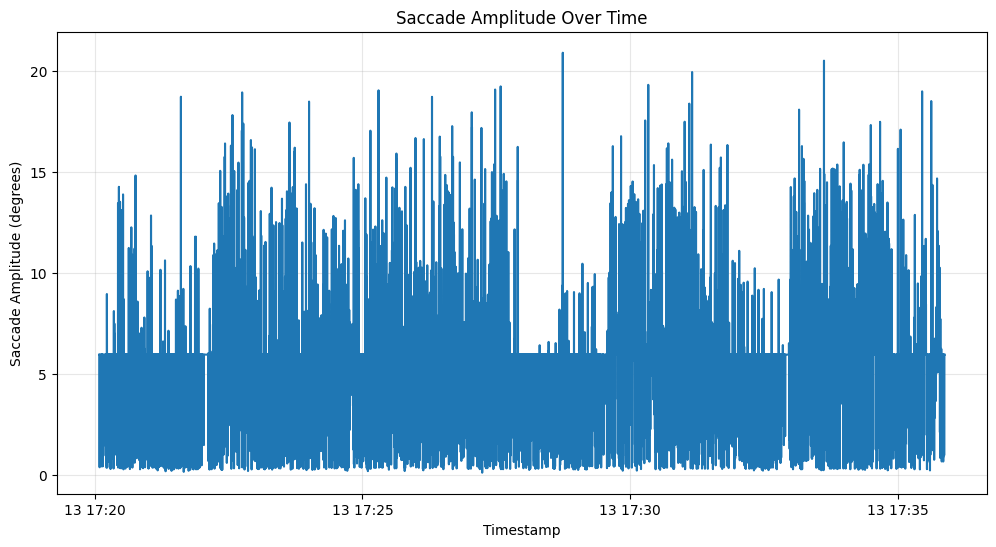

In [71]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Saccade Amplitude', data=iv)
plt.title('Saccade Amplitude Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Saccade Amplitude (degrees)')
plt.grid(alpha=0.3)
# plt.tight_layout()
plt.show()

* Periods of high saccade amplitude (peaks)
➡ These are moments where the participant’s eye made large movements — possibly scanning for targets, switching between stimuli, or being unsure where to look.

* Periods of low saccade amplitude (flat areas)
➡ These are times when eye movements were small → focused attention on one area or careful local inspection.

* Variation across time
➡ The plot shows fluctuations — alternating between searching/exploring (high saccades) and focusing (low saccades).
➡ Could reflect task difficulty, attention shifts, or changes in mental strategy.

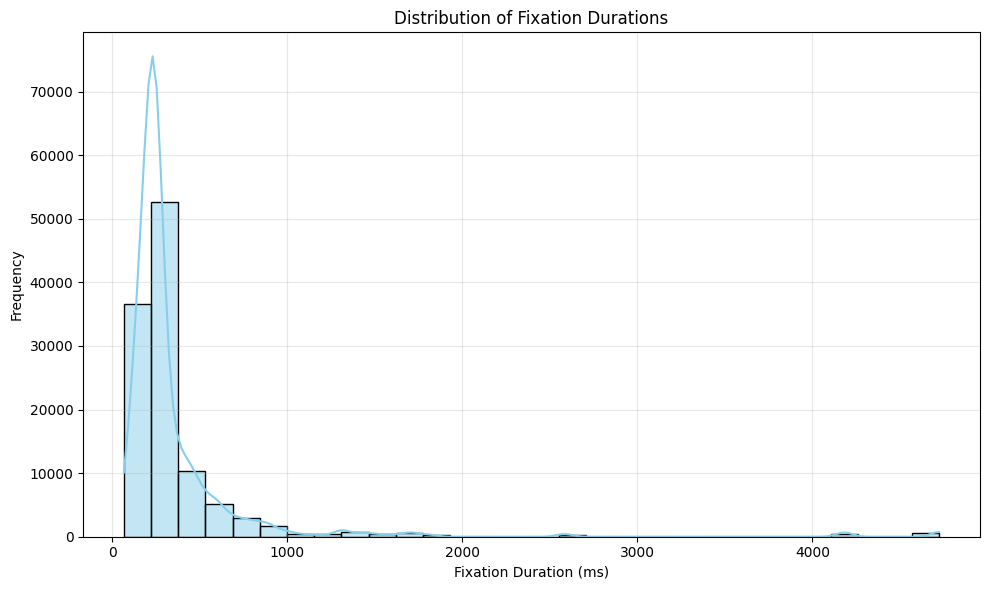

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(iv['Fixation Duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Fixation Durations')
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* Most fixations are short (clustered on the left side, < 500 ms).
* There is a long right tail → a few fixations lasted much longer (up to 8000 ms), but they are rare.
* The distribution is positively skewed (long tail to the right).

* Fixation duration reflects cognitive processing:
* Short fixations (~100–300 ms) → normal reading, scanning, or simple processing.
* Long fixations (>500 ms) → deeper cognitive effort, difficulty, confusion, or decision making.
* Outliers (extreme durations) → could indicate distraction, system pauses, or recording artifacts.

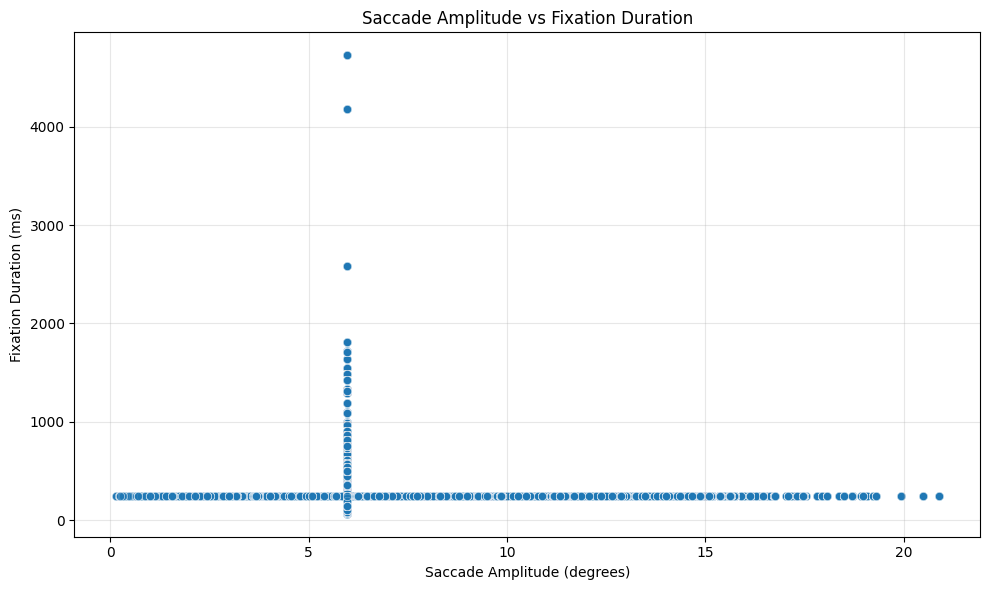

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Saccade Amplitude', y='Fixation Duration', data=iv, alpha=0.5)
plt.title('Saccade Amplitude vs Fixation Duration')
plt.xlabel('Saccade Amplitude (degrees)')
plt.ylabel('Fixation Duration (ms)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Eye-tracking data showed dynamic shifts between exploratory and focused viewing, as seen in the variation of saccade amplitude over time.

Participants demonstrated a mix of short and long fixations, indicating phases of fast scanning and deep analysis.

Gaze patterns revealed that certain areas of the task space received repeated attention, possibly linked to key task elements.

The combination of saccade size and fixation time can give clues about whether participants are searching or processing.

## **EYE**

In [74]:
ey=pd.read_csv('17_EYE.csv') 
ey.head()

UnixTime  Row QuestionKey                   Timestamp  ET_GazeLeftx  \
0  1.676289e+09    1         NaN  2023-02-13 17:20:05.022000           NaN   
1  1.676289e+09    2         NaN  2023-02-13 17:20:05.029759        1111.0   
2  1.676289e+09    3         NaN  2023-02-13 17:20:05.038106        1110.0   
3  1.676289e+09    4         NaN  2023-02-13 17:20:05.046436        1105.0   
4  1.676289e+09    5         NaN  2023-02-13 17:20:05.054882        1118.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0           NaN            NaN            NaN           NaN            NaN   
1         577.0         1081.0          595.0     -1.000000      -1.000000   
2         585.0         1089.0          585.0      3.195221       2.999741   
3         577.0         1094.0          577.0     -1.000000      -1.000000   
4         566.0         1110.0          568.0     -1.000000      -1.000000   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0            NaN              NaN               NaN             NaN   
1         33.321       606.916931        611.030273        0.535146   
2         41.668       607.053772        611.147644        0.534990   
3         49.998       607.100098        611.179749        0.534910   
4         58.444       607.232910        611.299194        0.534947   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0             NaN              NaN              NaN              NaN   
1        0.518376         0.372528         0.524641              0.0   
2        0.518371         0.372388         0.524718              0.0   
3        0.518403         0.372353         0.524724              0.0   
4        0.518385         0.372384         0.524695              0.0   

   ET_ValidityRight  
0               NaN  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [75]:
ey.isnull().sum()

UnixTime                0
Row                     0
QuestionKey         44066
Timestamp               0
ET_GazeLeftx            4
ET_GazeLefty            4
ET_GazeRightx           4
ET_GazeRighty           4
ET_PupilLeft            4
ET_PupilRight           4
ET_TimeSignal           4
ET_DistanceLeft         4
ET_DistanceRight        4
ET_CameraLeftX          4
ET_CameraLeftY          4
ET_CameraRightX         4
ET_CameraRightY         4
ET_ValidityLeft         4
ET_ValidityRight        4
dtype: int64

In [76]:
ey.shape

(113678, 19)

In [77]:
ey_cr=ey.select_dtypes(include=['float64','int64'])
ey_corr=ey_cr.corr().round(2)
ey_corr

UnixTime   Row  ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  \
UnixTime              1.00  1.00         -0.09          0.08          -0.06   
Row                   1.00  1.00         -0.09          0.08          -0.06   
ET_GazeLeftx         -0.09 -0.09          1.00          0.24           0.79   
ET_GazeLefty          0.08  0.08          0.24          1.00           0.09   
ET_GazeRightx        -0.06 -0.06          0.79          0.09           1.00   
ET_GazeRighty         0.05  0.05          0.07          0.73           0.28   
ET_PupilLeft          0.04  0.04          0.06          0.10           0.06   
ET_PupilRight         0.03  0.03         -0.00          0.03           0.11   
ET_TimeSignal         1.00  1.00         -0.09          0.08          -0.06   
ET_DistanceLeft       0.03  0.03          0.49          0.56           0.24   
ET_DistanceRight      0.05  0.05          0.17          0.23           0.51   
ET_CameraLeftX        0.03  0.03          0.49          0.56           0.23   
ET_CameraLeftY        0.03  0.03          0.49          0.56           0.24   
ET_CameraRightX       0.05  0.05          0.17          0.23           0.52   
ET_CameraRightY       0.03  0.03          0.18          0.24           0.52   
ET_ValidityLeft      -0.02 -0.02         -0.50         -0.56          -0.24   
ET_ValidityRight     -0.03 -0.03         -0.18         -0.23          -0.53   

                  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  ET_TimeSignal  \
UnixTime                   0.05          0.04           0.03           1.00   
Row                        0.05          0.04           0.03           1.00   
ET_GazeLeftx               0.07          0.06          -0.00          -0.09   
ET_GazeLefty               0.73          0.10           0.03           0.08   
ET_GazeRightx              0.28          0.06           0.11          -0.06   
ET_GazeRighty              1.00          0.07           0.11           0.05   
ET_PupilLeft               0.07          1.00           0.95           0.04   
ET_PupilRight              0.11          0.95           1.00           0.03   
ET_TimeSignal              0.05          0.04           0.03           1.00   
ET_DistanceLeft            0.25          0.18           0.05           0.03   
ET_DistanceRight           0.56          0.13           0.19           0.05   
ET_CameraLeftX             0.25          0.18           0.05           0.03   
ET_CameraLeftY             0.26          0.18           0.05           0.03   
ET_CameraRightX            0.56          0.13           0.19           0.05   
ET_CameraRightY            0.57          0.13           0.19           0.03   
ET_ValidityLeft           -0.25         -0.18          -0.05          -0.02   
ET_ValidityRight          -0.56         -0.13          -0.19          -0.03   

                  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
UnixTime                     0.03              0.05            0.03   
Row                          0.03              0.05            0.03   
ET_GazeLeftx                 0.49              0.17            0.49   
ET_GazeLefty                 0.56              0.23            0.56   
ET_GazeRightx                0.24              0.51            0.23   
ET_GazeRighty                0.25              0.56            0.25   
ET_PupilLeft                 0.18              0.13            0.18   
ET_PupilRight                0.05              0.19            0.05   
ET_TimeSignal                0.03              0.05            0.03   
ET_DistanceLeft              1.00              0.47            1.00   
ET_DistanceRight             0.47              1.00            0.47   
ET_CameraLeftX               1.00              0.47            1.00   
ET_CameraLeftY               1.00              0.47            1.00   
ET_CameraRightX              0.47              1.00            0.47   
ET_CameraRightY              0.47              1.00            0.47   
ET_ValidityLeft             -1.00   

In [78]:
ey.dtypes

UnixTime            float64
Row                   int64
QuestionKey          object
Timestamp            object
ET_GazeLeftx        float64
ET_GazeLefty        float64
ET_GazeRightx       float64
ET_GazeRighty       float64
ET_PupilLeft        float64
ET_PupilRight       float64
ET_TimeSignal       float64
ET_DistanceLeft     float64
ET_DistanceRight    float64
ET_CameraLeftX      float64
ET_CameraLeftY      float64
ET_CameraRightX     float64
ET_CameraRightY     float64
ET_ValidityLeft     float64
ET_ValidityRight    float64
dtype: object

In [79]:

ey['Timestamp'] = pd.to_datetime(ey['Timestamp'],errors='coerce')


In [80]:
# Identify columns with outliers using IQR
numeric_cols = ey.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = ey[col].quantile(0.25)
    Q3 = ey[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((ey[col] < lower) | (ey[col] > upper)).any():
        outlier_cols.append(col)

In [81]:
for col in ey.columns:
    if ey[col].isnull().any():
        if col in outlier_cols:
            ey[col] = ey[col].fillna(ey[col].median())
        elif ey[col].dtype in ['float64', 'int64']:
            ey[col] = ey[col].fillna(ey[col].mean())
        else:
            ey[col] = ey[col].fillna(ey[col].mode()[0])

In [82]:
ey.isnull().sum()

UnixTime            0
Row                 0
QuestionKey         0
Timestamp           0
ET_GazeLeftx        0
ET_GazeLefty        0
ET_GazeRightx       0
ET_GazeRighty       0
ET_PupilLeft        0
ET_PupilRight       0
ET_TimeSignal       0
ET_DistanceLeft     0
ET_DistanceRight    0
ET_CameraLeftX      0
ET_CameraLeftY      0
ET_CameraRightX     0
ET_CameraRightY     0
ET_ValidityLeft     0
ET_ValidityRight    0
dtype: int64

In [83]:
ey.dtypes

UnixTime                   float64
Row                          int64
QuestionKey                 object
Timestamp           datetime64[ns]
ET_GazeLeftx               float64
ET_GazeLefty               float64
ET_GazeRightx              float64
ET_GazeRighty              float64
ET_PupilLeft               float64
ET_PupilRight              float64
ET_TimeSignal              float64
ET_DistanceLeft            float64
ET_DistanceRight           float64
ET_CameraLeftX             float64
ET_CameraLeftY             float64
ET_CameraRightX            float64
ET_CameraRightY            float64
ET_ValidityLeft            float64
ET_ValidityRight           float64
dtype: object

In [84]:
ey.columns.tolist()

['UnixTime',
 'Row',
 'QuestionKey',
 'Timestamp',
 'ET_GazeLeftx',
 'ET_GazeLefty',
 'ET_GazeRightx',
 'ET_GazeRighty',
 'ET_PupilLeft',
 'ET_PupilRight',
 'ET_TimeSignal',
 'ET_DistanceLeft',
 'ET_DistanceRight',
 'ET_CameraLeftX',
 'ET_CameraLeftY',
 'ET_CameraRightX',
 'ET_CameraRightY',
 'ET_ValidityLeft',
 'ET_ValidityRight']

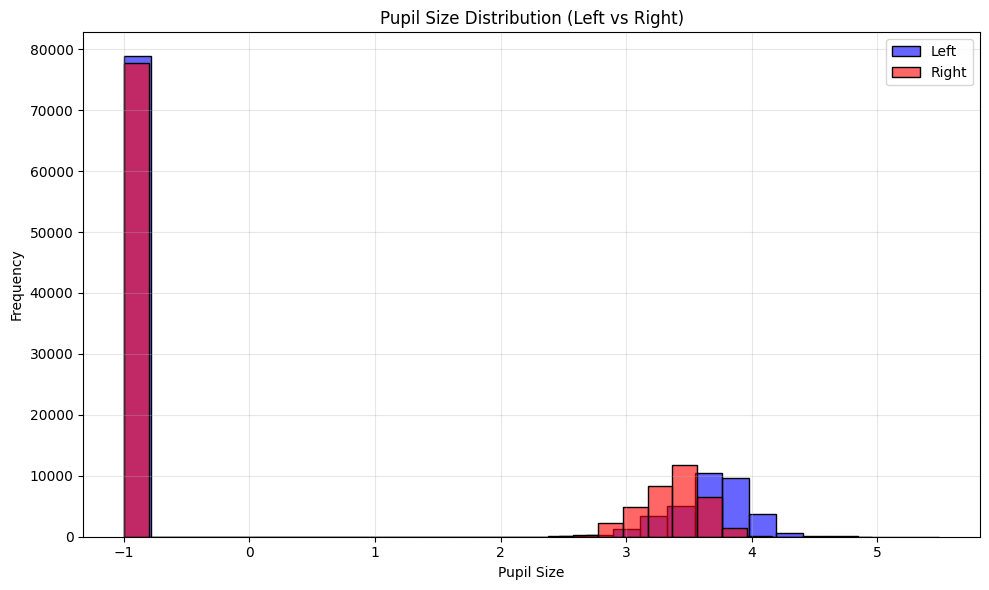

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(ey['ET_PupilLeft'], bins=30, color='blue', label='Left', alpha=0.6)
sns.histplot(ey['ET_PupilRight'], bins=30, color='red', label='Right', alpha=0.6)
plt.title('Pupil Size Distribution (Left vs Right)')
plt.xlabel('Pupil Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Similar distributions → consistent tracking + lighting.
- Bigger pupil sizes → possibly higher cognitive effort or arousal.


In [86]:
validity = pd.concat([
    ey['ET_ValidityLeft'].rename('Validity').to_frame(),
    ey['ET_ValidityRight'].rename('Validity').to_frame()
])

plt.figure(figsize=(8, 6))
sns.countplot(x='Validity', data=validity)
plt.title('Eye-Tracking Data Validity Codes (Combined Left + Right)')
plt.xlabel('Validity Code')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




0 = good validity

Higher numbers = reduced data quality

Inference
-Mostly 0s → clean data
-Many 4→ noise, may need filtering

In [87]:
# Clean keys to match
ey['CleanKey'] = ey['QuestionKey'].astype(str).str.replace(r'^\d+', '', regex=True).str.strip().str.lower()
psy['QuestionNumber'] = psy['QuestionNumber'].astype(str).str.strip().str.lower()

# Define strategy in PSY
RT_THRESHOLD = 5
psy['Strategy'] = psy['ResponseTime'].apply(lambda x: 'Holistic' if x < RT_THRESHOLD else 'Piecemeal')

# Merge
ey = ey.merge(
    psy[['QuestionNumber', 'ResponseTime', 'Strategy']],
    left_on='CleanKey',
    right_on='QuestionNumber',
    how='left'
)

# Check merge worked
print(ey[['CleanKey', 'ResponseTime', 'Strategy']].head())


  CleanKey  ResponseTime   Strategy
0    item5         47.70  Piecemeal
1    item5         13.39  Piecemeal
2    item5          8.87  Piecemeal
3    item5         47.70  Piecemeal
4    item5         13.39  Piecemeal


C:\Users\Hp\AppData\Local\Temp\ipykernel_13580\1595222774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ey, x='Strategy', y='ET_PupilLeft', inner='quartile', palette='Set2')


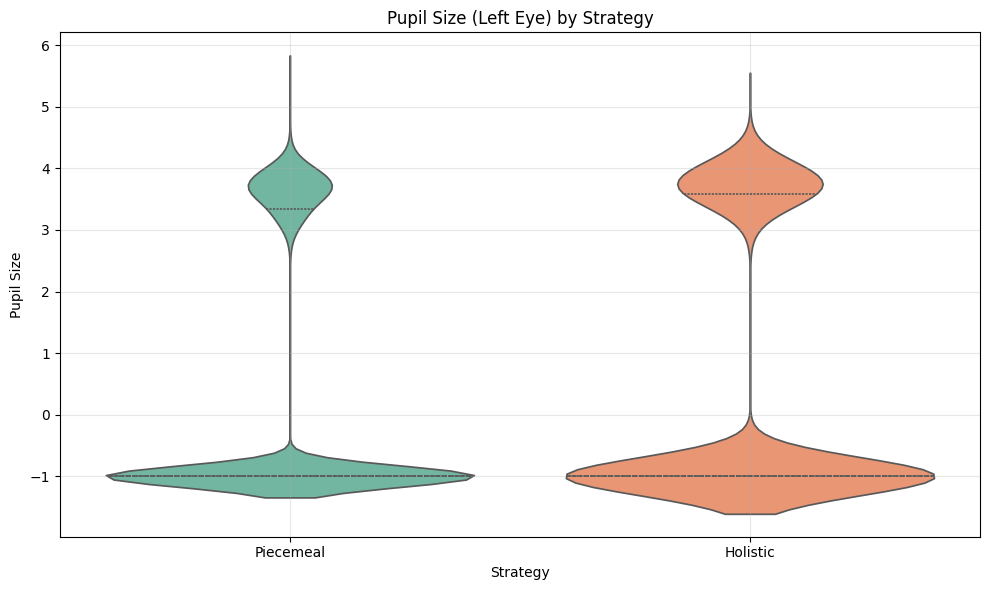

In [88]:


plt.figure(figsize=(10, 6))
sns.violinplot(data=ey, x='Strategy', y='ET_PupilLeft', inner='quartile', palette='Set2')
plt.title('Pupil Size (Left Eye) by Strategy')
plt.xlabel('Strategy')
plt.ylabel('Pupil Size')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* Both Piecemeal and Holistic groups have a major cluster of pupil sizes around 3 to 3.5 units.
* There’s a very flat, wide base near -1 pupil size — this looks suspicious:
* Pupil size cannot be negative → likely represents missing data, noise, or tracking errors that were coded as -1.
* These need to be cleaned before interpreting the true distribution.
* The main pupil size distribution (around 3-3.5) seems very similar across strategies:
* Both Piecemeal and Holistic show similar median and spread in valid data range

## **BlankScreenData**

In [89]:
bd=pd.read_csv('17_BlankScreenData.csv')
bd.head()

UnixTime    Row       Segment                   Timestamp  \
0  1.676289e+09  13057  BlankScreen1  2023-02-13 17:21:53.804106   
1  1.676289e+09  13058  BlankScreen1  2023-02-13 17:21:53.812788   
2  1.676289e+09  13059  BlankScreen1  2023-02-13 17:21:53.820698   
3  1.676289e+09  13060  BlankScreen1  2023-02-13 17:21:53.829032   
4  1.676289e+09  13061  BlankScreen1  2023-02-13 17:21:53.837362   

   ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  \
0          -1.0          -1.0          796.0          506.0     -1.000000   
1         785.0         520.0          788.0          462.0     -1.000000   
2         775.0         523.0          781.0          503.0     -1.000000   
3         808.0         522.0          774.0          482.0      3.426788   
4         810.0         510.0          789.0          489.0     -1.000000   

   ET_PupilRight  ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  \
0       3.175064     108807.668        -1.000000        681.811951   
1      -1.000000     108816.350       680.364929        681.593323   
2      -1.000000     108824.260       680.168579        681.481018   
3       3.283646     108832.594       679.979858        681.420837   
4      -1.000000     108840.924       679.725647        681.356262   

   ET_CameraLeftX  ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  \
0       -1.000000       -1.000000         0.408148         0.537414   
1        0.554339        0.544424         0.408169         0.537368   
2        0.554464        0.544401         0.408233         0.537390   
3        0.554442        0.544369         0.408194         0.537390   
4        0.554410        0.544432         0.408214         0.537356   

   ET_ValidityLeft  ET_ValidityRight  
0              4.0               0.0  
1              0.0               0.0  
2              0.0               0.0  
3              0.0               0.0  
4              0.0               0.0

In [90]:
bd.dtypes

UnixTime            float64
Row                   int64
Segment              object
Timestamp            object
ET_GazeLeftx        float64
ET_GazeLefty        float64
ET_GazeRightx       float64
ET_GazeRighty       float64
ET_PupilLeft        float64
ET_PupilRight       float64
ET_TimeSignal       float64
ET_DistanceLeft     float64
ET_DistanceRight    float64
ET_CameraLeftX      float64
ET_CameraLeftY      float64
ET_CameraRightX     float64
ET_CameraRightY     float64
ET_ValidityLeft     float64
ET_ValidityRight    float64
dtype: object

In [91]:
bd['Timestamp'] = pd.to_datetime(bd['Timestamp'], errors='coerce')

In [92]:
bd.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5395    False
5396    False
5397    False
5398    False
5399    False
Length: 5400, dtype: bool

In [93]:
bd.isnull().sum()

UnixTime            0
Row                 0
Segment             0
Timestamp           0
ET_GazeLeftx        0
ET_GazeLefty        0
ET_GazeRightx       0
ET_GazeRighty       0
ET_PupilLeft        0
ET_PupilRight       0
ET_TimeSignal       0
ET_DistanceLeft     0
ET_DistanceRight    0
ET_CameraLeftX      0
ET_CameraLeftY      0
ET_CameraRightX     0
ET_CameraRightY     0
ET_ValidityLeft     0
ET_ValidityRight    0
dtype: int64

In [94]:
# Identify columns with outliers using IQR
numeric_cols = bd.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = bd[col].quantile(0.25)
    Q3 = bd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((bd[col] < lower) | (bd[col] > upper)).any():
        print(outlier_cols.append(col))

None
None
None
None
None
None
None
None
None
None
None
None


In [95]:
bd_cr=bd.select_dtypes(include=['float64','int64'])
bd_corr=bd_cr.corr().round(2)
bd_corr

UnixTime   Row  ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  \
UnixTime              1.00  1.00         -0.11          0.00          -0.08   
Row                   1.00  1.00         -0.11          0.00          -0.08   
ET_GazeLeftx         -0.11 -0.11          1.00          0.74           0.65   
ET_GazeLefty          0.00  0.00          0.74          1.00           0.44   
ET_GazeRightx        -0.08 -0.08          0.65          0.44           1.00   
ET_GazeRighty         0.00  0.00          0.41          0.63           0.72   
ET_PupilLeft          0.06  0.06          0.16          0.18           0.09   
ET_PupilRight         0.04  0.04         -0.06         -0.03           0.17   
ET_TimeSignal         1.00  1.00         -0.11          0.00          -0.08   
ET_DistanceLeft       0.09  0.09          0.86          0.87           0.47   
ET_DistanceRight      0.10  0.10          0.49          0.56           0.84   
ET_CameraLeftX        0.09  0.09          0.86          0.87           0.47   
ET_CameraLeftY        0.08  0.08          0.86          0.87           0.47   
ET_CameraRightX       0.11  0.11          0.49          0.56           0.84   
ET_CameraRightY       0.08  0.08          0.50          0.56           0.85   
ET_ValidityLeft      -0.08 -0.08         -0.86         -0.87          -0.47   
ET_ValidityRight     -0.10 -0.10         -0.49         -0.56          -0.85   

                  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  ET_TimeSignal  \
UnixTime                   0.00          0.06           0.04           1.00   
Row                        0.00          0.06           0.04           1.00   
ET_GazeLeftx               0.41          0.16          -0.06          -0.11   
ET_GazeLefty               0.63          0.18          -0.03           0.00   
ET_GazeRightx              0.72          0.09           0.17          -0.08   
ET_GazeRighty              1.00          0.12           0.18           0.00   
ET_PupilLeft               0.12          1.00           0.90           0.06   
ET_PupilRight              0.18          0.90           1.00           0.04   
ET_TimeSignal              0.00          0.06           0.04           1.00   
ET_DistanceLeft            0.51          0.22          -0.03           0.09   
ET_DistanceRight           0.88          0.15           0.21           0.10   
ET_CameraLeftX             0.51          0.22          -0.03           0.09   
ET_CameraLeftY             0.51          0.21          -0.03           0.08   
ET_CameraRightX            0.88          0.15           0.21           0.11   
ET_CameraRightY            0.88          0.15           0.21           0.08   
ET_ValidityLeft           -0.51         -0.21           0.03          -0.08   
ET_ValidityRight          -0.88         -0.15          -0.21          -0.10   

                  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
UnixTime                     0.09              0.10            0.09   
Row                          0.09              0.10            0.09   
ET_GazeLeftx                 0.86              0.49            0.86   
ET_GazeLefty                 0.87              0.56            0.87   
ET_GazeRightx                0.47              0.84            0.47   
ET_GazeRighty                0.51              0.88            0.51   
ET_PupilLeft                 0.22              0.15            0.22   
ET_PupilRight               -0.03              0.21           -0.03   
ET_TimeSignal                0.09              0.10            0.09   
ET_DistanceLeft              1.00              0.59            1.00   
ET_DistanceRight             0.59              1.00            0.59   
ET_CameraLeftX               1.00              0.59            1.00   
ET_CameraLeftY               1.00              0.59            1.00   
ET_CameraRightX              0.59              1.00            0.59   
ET_CameraRightY              0.59              1.00            0.59   
ET_ValidityLeft             -1.00   

In [96]:
bd.head()

UnixTime    Row       Segment                  Timestamp  ET_GazeLeftx  \
0  1.676289e+09  13057  BlankScreen1 2023-02-13 17:21:53.804106          -1.0   
1  1.676289e+09  13058  BlankScreen1 2023-02-13 17:21:53.812788         785.0   
2  1.676289e+09  13059  BlankScreen1 2023-02-13 17:21:53.820698         775.0   
3  1.676289e+09  13060  BlankScreen1 2023-02-13 17:21:53.829032         808.0   
4  1.676289e+09  13061  BlankScreen1 2023-02-13 17:21:53.837362         810.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0          -1.0          796.0          506.0     -1.000000       3.175064   
1         520.0          788.0          462.0     -1.000000      -1.000000   
2         523.0          781.0          503.0     -1.000000      -1.000000   
3         522.0          774.0          482.0      3.426788       3.283646   
4         510.0          789.0          489.0     -1.000000      -1.000000   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0     108807.668        -1.000000        681.811951       -1.000000   
1     108816.350       680.364929        681.593323        0.554339   
2     108824.260       680.168579        681.481018        0.554464   
3     108832.594       679.979858        681.420837        0.554442   
4     108840.924       679.725647        681.356262        0.554410   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0       -1.000000         0.408148         0.537414              4.0   
1        0.544424         0.408169         0.537368              0.0   
2        0.544401         0.408233         0.537390              0.0   
3        0.544369         0.408194         0.537390              0.0   
4        0.544432         0.408214         0.537356              0.0   

   ET_ValidityRight  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

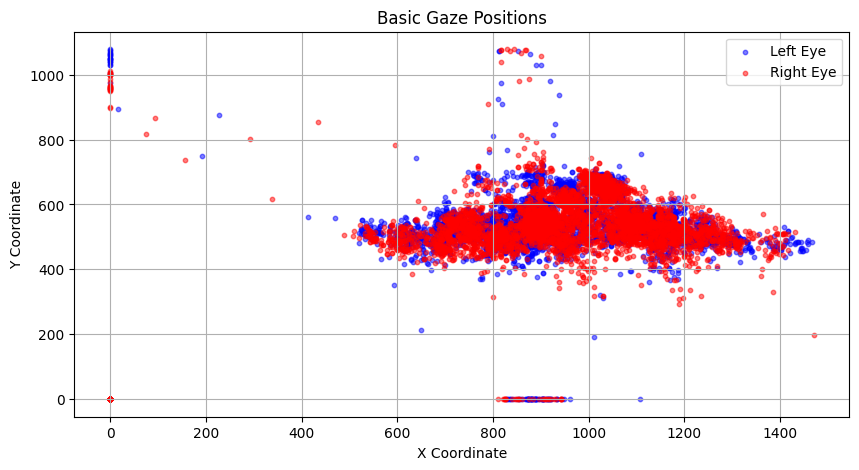

In [97]:
plt.figure(figsize=(10, 5))

# Left eye
plt.scatter(bd['ET_GazeLeftx'], bd['ET_GazeLefty'], 
            alpha=0.5, s=10, label='Left Eye', color='blue')

# Right eye
plt.scatter(bd['ET_GazeRightx'], bd['ET_GazeRighty'], 
            alpha=0.5, s=10, label='Right Eye', color='red')

plt.title('Basic Gaze Positions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

- Fixation clusters: Dense point clouds show where the eyes lingered (even on a blank screen, this may reveal default gaze patterns)
- Tracking alignment: If red/blue dots overlap well → good binocular tracking. If separated → possible calibration issues
- Data coverage: Gaps indicate missing data (e.g., during blinks)